In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

Image: 


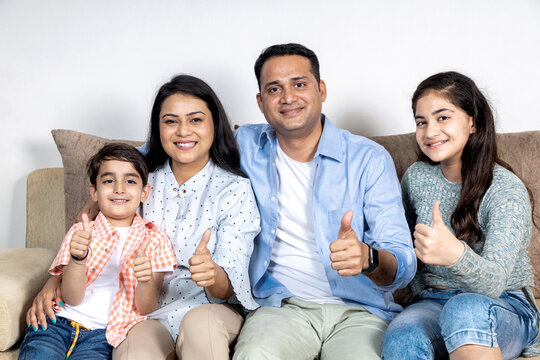

In [ ]:
img = cv2.imread("download.jpg")
print("Image: ")
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Grayscale Image:


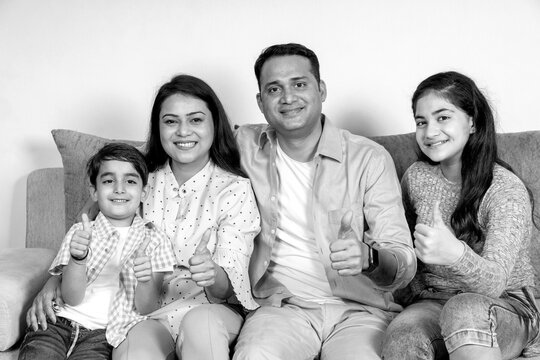

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Grayscale Image:")
cv2_imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Image: 


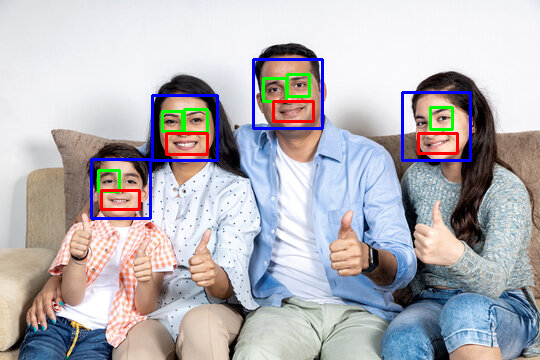

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
  # cv2.putText(img, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
  img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]+

  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex, ey, ew, eh) in eyes:
    # cv2.putText(roi_color, "Eye", (ex, ey - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0),2)

  smile=smile_cascade.detectMultiScale(roi_gray)
  for (sx, sy, sw, sh) in smile:
    cv2.rectangle(roi_color, (sx,sy), (sx+sw, sy+sh), (0,0,255),2)
    # cv2.putText(roi_color, "Smile", (sx, sy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)


print("Image: ")
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()